<a href="https://colab.research.google.com/github/Lisavetti/DaTaAnalys_1/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

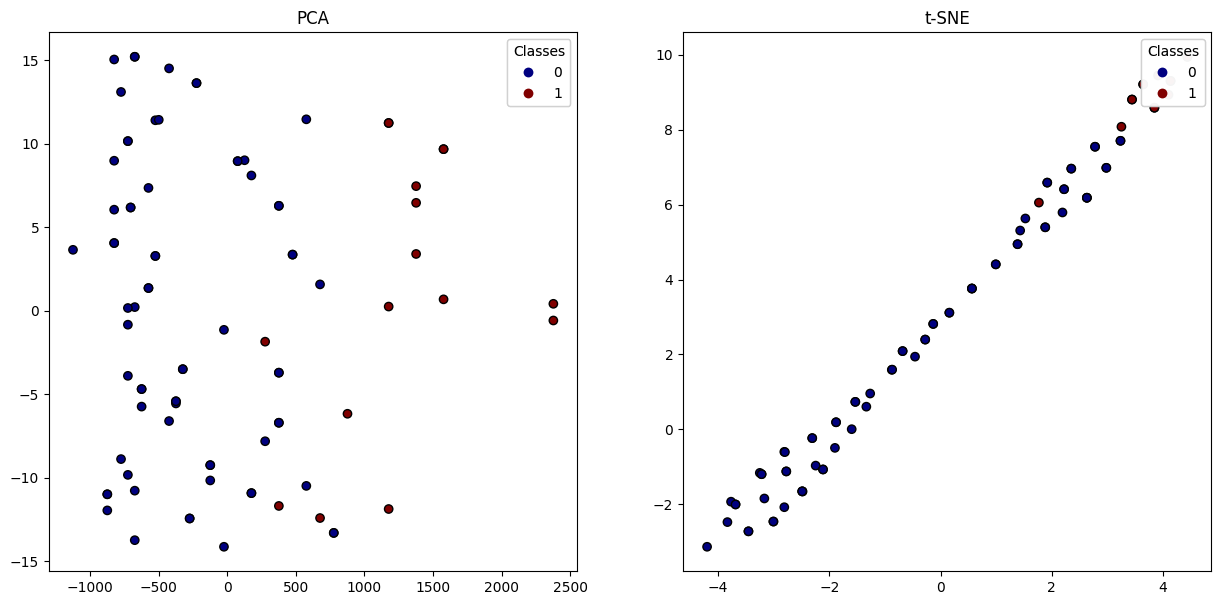

_________________________________________________________________________
Fitting model on a small sub-sample of the data
done in 0.045s.
Predicting color indices on the full image (k-means)
done in 0.042s.
Predicting color indices on the full image (random)
done in 0.077s.


<ipython-input-23-bd9a459609f7>:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  flower = imageio.imread('marguerite-729510_640.jpg')


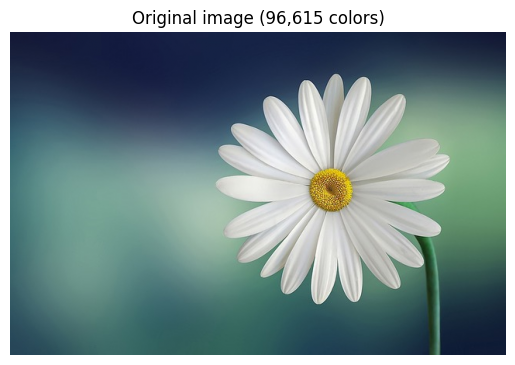

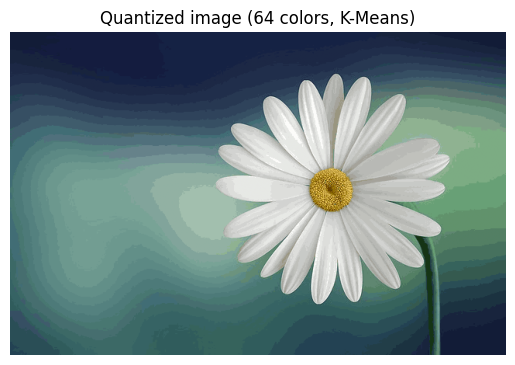

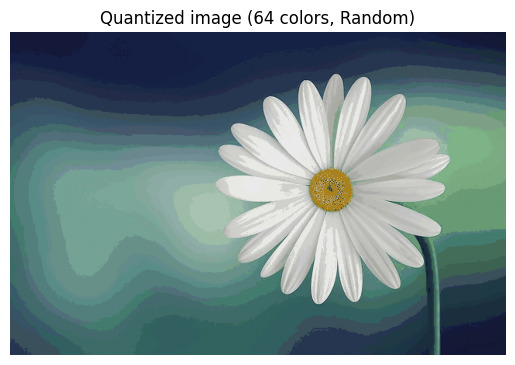

_________________________________________________________________________
Fitting model on a small sub-sample of the data
done in 0.026s.
Predicting color indices on the full image (k-means)
done in 0.040s.
Predicting color indices on the full image (random)
done in 0.054s.


<ipython-input-23-bd9a459609f7>:134: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  flower = imageio.imread('marguerite-729510_640.jpg')


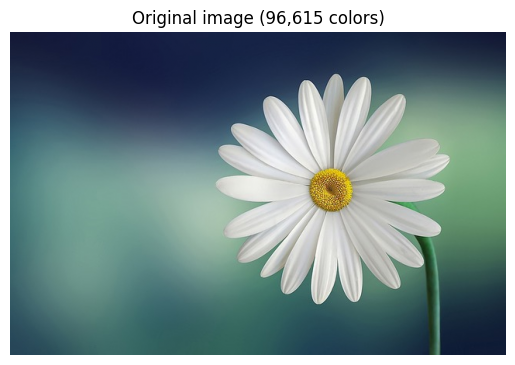

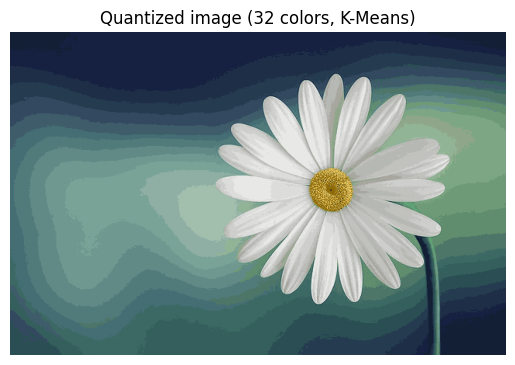

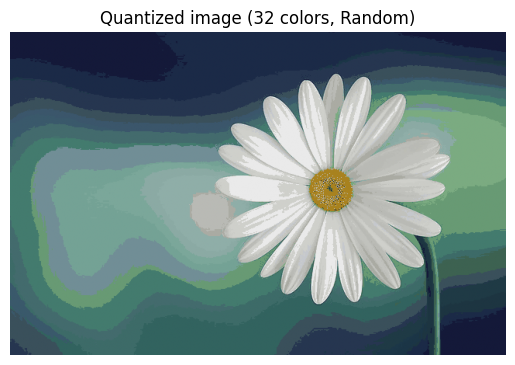

_________________________________________________________________________
Fitting model on a small sub-sample of the data
done in 0.042s.
Predicting color indices on the full image (k-means)
done in 0.013s.
Predicting color indices on the full image (random)
done in 0.026s.


<ipython-input-23-bd9a459609f7>:196: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  flower = imageio.imread('marguerite-729510_640.jpg')


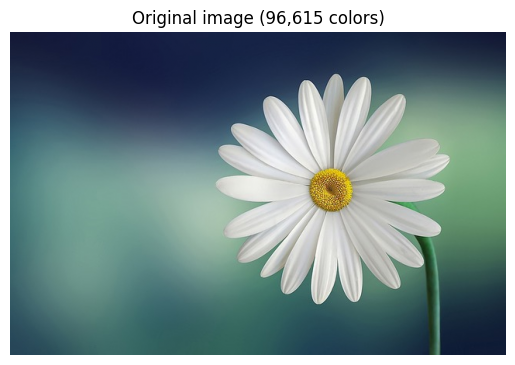

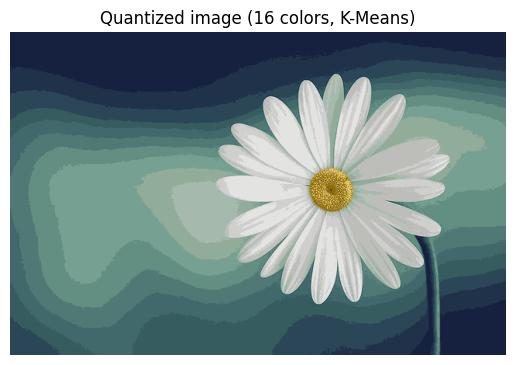

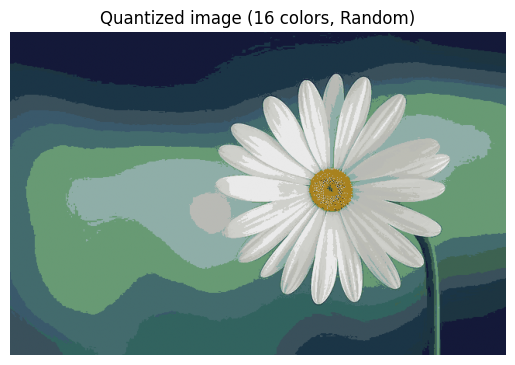

_________________________________________________________________________
Fitting model on a small sub-sample of the data
done in 0.032s.
Predicting color indices on the full image (k-means)
done in 0.009s.
Predicting color indices on the full image (random)
done in 0.031s.


<ipython-input-23-bd9a459609f7>:255: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  flower = imageio.imread('marguerite-729510_640.jpg')


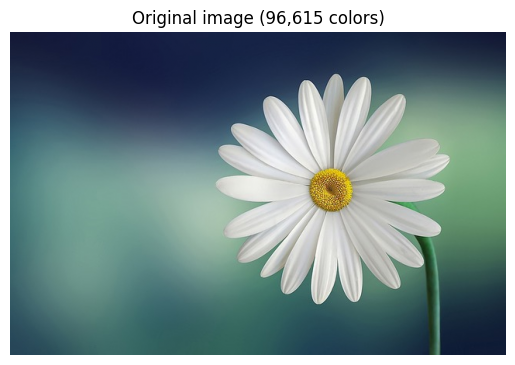

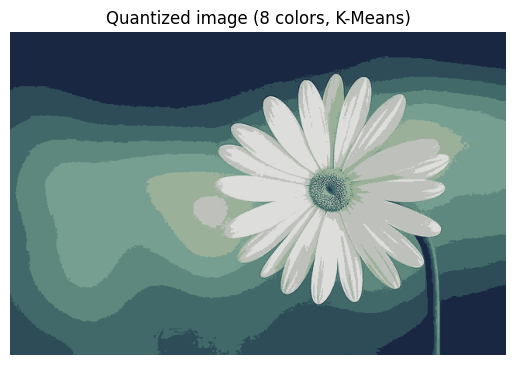

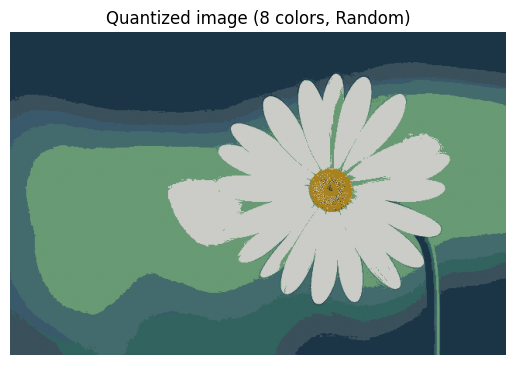

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


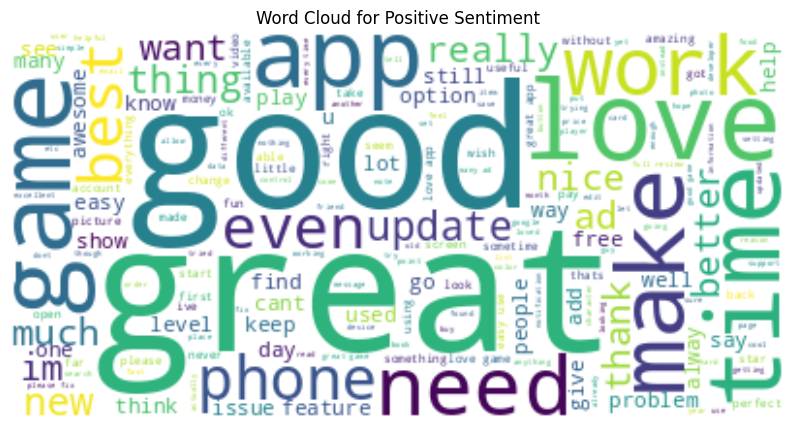

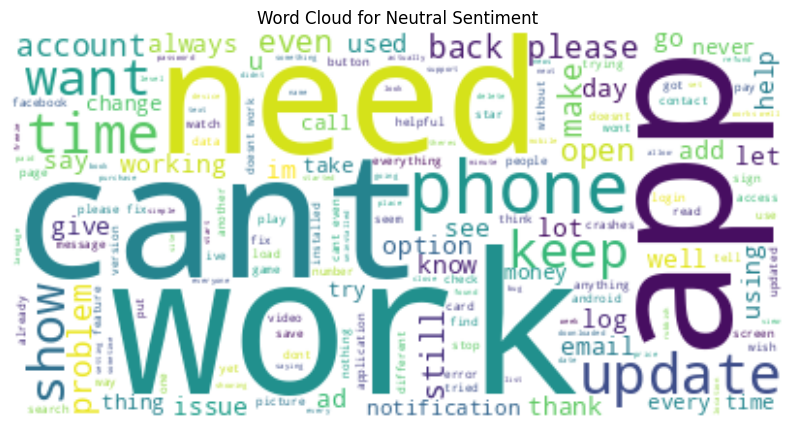

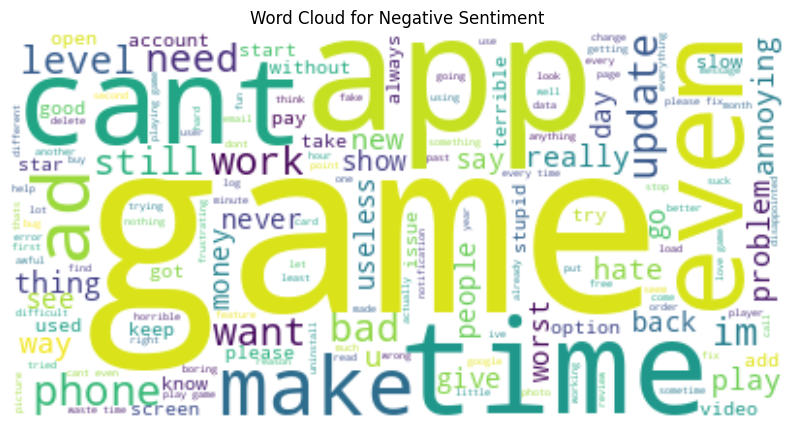

              precision    recall  f1-score   support

    Negative       0.95      0.76      0.84      1654
     Neutral       0.88      0.92      0.90      1033
    Positive       0.92      0.97      0.95      4800

    accuracy                           0.92      7487
   macro avg       0.92      0.89      0.90      7487
weighted avg       0.92      0.92      0.92      7487

Точність: 0.9187925737945772
[[1262   55  337]
 [  12  953   68]
 [  61   75 4664]]


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

from time import time
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
import imageio


from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import string
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


# Завантаження вашого датасету
df = pd.read_csv('fraud_dataset.csv')

# Видалення стовпця 'transaction_id', оскільки він, швидше за все, не має прогностичної цінності
df = df.drop(columns=['transaction_id'])

# Перетворення категоріальних даних на числові
le = LabelEncoder()
for column in ['location', 'merchant', 'gender']:
    df[column] = le.fit_transform(df[column])

X = df.drop('fraud_label', axis=1)
y = df['fraud_label']

# Зниження розмірності за допомогою PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Зниження розмірності за допомогою t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Візуалізація
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Візуалізація PCA
scatter = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', edgecolor='k')
ax[0].set_title("PCA")
legend1 = ax[0].legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax[0].add_artist(legend1)

# Візуалізація t-SNE
scatter = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='jet', edgecolor='k')
ax[1].set_title("t-SNE")
legend2 = ax[1].legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax[1].add_artist(legend2)

plt.show()



print("_________________________________________________________________________")
flower = imageio.imread('marguerite-729510_640.jpg')
n_colors64 = 64


# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
flower = np.array(flower, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors64, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors64)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors64} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors64} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()


print("_________________________________________________________________________")
flower = imageio.imread('marguerite-729510_640.jpg')
n_colors32 = 32

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
flower = np.array(flower, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors32, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors32)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors32} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors32} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()
print("_________________________________________________________________________")


flower = imageio.imread('marguerite-729510_640.jpg')
n_colors16 = 16
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
flower = np.array(flower, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors16, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors16)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors16} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors16} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()
print("_________________________________________________________________________")
flower = imageio.imread('marguerite-729510_640.jpg')
n_colors8 = 8

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
flower = np.array(flower, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors8, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors8)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors8} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors8} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()





df = pd.read_csv('googleplaystore_user_reviews.csv')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Видалення пунктуації та стоп-слів
df['Processed_Review'] = df['Translated_Review'].apply(lambda x: ' '.join([word.lower() for word in str(x).translate(str.maketrans('', '', string.punctuation)).split() if word.lower() not in stop_words]))

sentiments = df['Sentiment'].dropna().unique()

# WordCloud для кожного настрою
for sentiment in sentiments:
    temp_df = df[df['Sentiment'] == sentiment]
    text = ' '.join(review for review in temp_df.Processed_Review)
    wordcloud = WordCloud(background_color='white').generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()



tfidf = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
X = tfidf.fit_transform(df['Processed_Review'].fillna(' ')).toarray()  # Замінюємо NaN порожніми рядками перед векторизацією
y = df['Sentiment']



# Отримання індексів рядків, які не містять NaN значень у стовпці 'Sentiment'
valid_indices = df[df['Sentiment'].notna()].index

# Фільтрація X і y, використовуючи ці індекси
X_valid = X[valid_indices]
y_valid = y[y.notna()]

# Розбиття даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=0, stratify=y_valid)


# Тренування класифікатора
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train.dropna())  # Замінюємо NaN порожніми рядками перед тренуванням

# Передбачення на тестових даних
y_pred = classifier.predict(X_test)

# Оцінка якості
print(classification_report(y_test.dropna(), y_pred))  # видаляємо NaN, оскільки ми не можемо надіслати їх до classification_report
print("Точність:", accuracy_score(y_test.dropna(), y_pred))
print(confusion_matrix(y_test, y_pred))

